In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv("Employee.csv")
df

Employee ID                                          Job Title  \
0          55478                                            finance   
1          55479                               accounting/financial   
2          55501                                    clerical/office   
3          55743                             entry-level accountant   
4          55753                                 accounting/finance   
5          55792                                  senior accountant   
6          55814                            bookkeeper/hr assistant   
7          55815                                    executive admin   
8          56016                                         accounting   
9          56031                                         accounting   
10         56033                                         accountant   
11         56137                                         accounting   
12         56225                            accounting professional   
13         56250                  administrative operations/support   
14         56362                              bookkeeper/accountant   
15         56577  accounts payables, medical receptionist, admin...   
16         56598                 finance /credit anlyst/ accounting   
17         56638                                   accounting clerk   
18         56777  accountant cost accountant accounts receivable...   
19         56806                                         accountant   
20         56860                                         accounting   
21         57043                                         accounting   
22         57087                             full charge bookkeeper   
23         57102                                  senior accountant   
24         57180  an accounting or administrative assistant posi...   
25         57307                 bookkeeping/ accounting/admin asst   
26         57346                                         bookkeeper   
27         57441  administrative assistant/accountant entry leve...   
28         57471                                   staff accountant   
29         57535                        accounts payable/receivable   
30         57582                         accounting/finance/payroll   
31         57585                              accounting/bookkeeper   
32         57602                          office manager/bookkeeper   
33         57851                                         accounting   
34         57958                                   business analyst   
35         58034                                           business   
36         58041  accounts receivable/payables and client servic...   
37         58051                                     office manager   
38         58055                                         accounting   
39         58220                                         accountant   
40         58267                                 part time clerical   
41         58285                                     administrative   
42         58294                      credit and collection manager   
43         58299                             accounting/ financing    
44         58417                                           AR clerk   
45         58445               controller/bookkeeper/office manager   
46         58543                             full charge bookkeeper   
47         58590                                         accountant   
48         58657                             full-charge bookkeeper   
49         58687               accounting clerk ~ financial advisor   
50         58707                     accounting/bookkeeping/payroll   
51         58909                                 accounting manager   
52         58926                                     administrative   
53         58964                              accountant/bookkeeper   
54         59006                           administration posistion   
55         59094             

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Employee ID                491 non-null    int64 
 1   Job Title                  491 non-null    object
 2   Industry                   491 non-null    object
 3   State                      491 non-null    object
 4   State Name                 491 non-null    object
 5   Employment Type            491 non-null    object
 6   Job Level                  491 non-null    object
 7   Education Level            491 non-null    object
 8   Willingness to Relocate    468 non-null    object
 9   Objective                  443 non-null    object
 10  Experience                 477 non-null    object
 11  Education                  468 non-null    object
 12  Skills                     395 non-null    object
 13  Additional Info            215 non-null    object
 14  MBTI Q1   

In [4]:
df.drop(labels=['Employee ID','Job Title','Industry','State','State Name','Objective','Experience','Education','Skills','Additional Info','Employment start date'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Employment Type            491 non-null    object
 1   Job Level                  491 non-null    object
 2   Education Level            491 non-null    object
 3   Willingness to Relocate    468 non-null    object
 4   MBTI Q1                    491 non-null    object
 5   MBTI Q1 Duration           491 non-null    object
 6   MBTI Q2                    491 non-null    object
 7   MBTI Q2 Duration           491 non-null    object
 8   MBTI Q3                    491 non-null    object
 9   MBTI Q3 Duration           491 non-null    object
 10  MBTI Q4                    491 non-null    object
 11  MBTI Q4 Duration           491 non-null    object
 12  MBTI Result                491 non-null    object
 13  Employment end date        37 non-null     object
 14  Meticulous

In [6]:
df['Willingness to Relocate'].fillna(value="Undecided",inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Employment Type            491 non-null    object
 1   Job Level                  491 non-null    object
 2   Education Level            491 non-null    object
 3   Willingness to Relocate    491 non-null    object
 4   MBTI Q1                    491 non-null    object
 5   MBTI Q1 Duration           491 non-null    object
 6   MBTI Q2                    491 non-null    object
 7   MBTI Q2 Duration           491 non-null    object
 8   MBTI Q3                    491 non-null    object
 9   MBTI Q3 Duration           491 non-null    object
 10  MBTI Q4                    491 non-null    object
 11  MBTI Q4 Duration           491 non-null    object
 12  MBTI Result                491 non-null    object
 13  Employment end date        37 non-null     object
 14  Meticulous

In [7]:
# creating a new column / feature that will tell either candidate is still working or not. This will be decided on Employment end date
df['Employment end date'].fillna(value='0',inplace=True)
still_working = []
def check_candidate_still_working(x):
    if(x=='0'):
        return 1
    else:
        return 0

df['Employment end date'] = df['Employment end date'].apply(lambda x:check_candidate_still_working(x))

df.rename(columns={"Employment end date": "Still_working"},inplace=True)

df
    

Employment Type                                 Job Level  \
0    Full-Time Permanent  Experienced with over 2 years experience   
1    Full-Time Permanent  Experienced with over 2 years experience   
2    Full-Time Permanent  Experienced with over 2 years experience   
3    Full-Time Permanent  Experienced with over 2 years experience   
4    Full-Time Permanent  Experienced with over 2 years experience   
5    Full-Time Permanent            Management (Manager, Director)   
6    Full-Time Permanent  Experienced with over 2 years experience   
7    Full-Time Permanent  Experienced with over 2 years experience   
8    Full-Time Permanent                      New Grad/Entry Level   
9    Full-Time Permanent  Experienced with over 2 years experience   
10   Full-Time Permanent                      New Grad/Entry Level   
11   Full-Time Permanent                      New Grad/Entry Level   
12   Full-Time Permanent            Management (Manager, Director)   
13   Full-Time Permanent  Experienced with over 2 years experience   
14   Full-Time Permanent                      New Grad/Entry Level   
15   Full-Time Permanent  Experienced with over 2 years experience   
16   Full-Time Permanent  Experienced with over 2 years experience   
17   Full-Time Permanent  Experienced with over 2 years experience   
18   Full-Time Permanent                      New Grad/Entry Level   
19   Full-Time Permanent            Management (Manager, Director)   
20   Full-Time Permanent  Experienced with over 2 years experience   
21   Full-Time Permanent  Experienced with over 2 years experience   
22   Full-Time Permanent            Management (Manager, Director)   
23   Full-Time Permanent            Management (Manager, Director)   
24   Full-Time Permanent  Experienced with over 2 years experience   
25   Full-Time Permanent  Experienced with over 2 years experience   
26   Full-Time Permanent  Experienced with over 2 years experience   
27   Full-Time Permanent                      New Grad/Entry Level   
28   Full-Time Permanent  Experienced with over 2 years experience   
29   Full-Time Permanent  Experienced with over 2 years experience   
30   Full-Time Permanent  Experienced with over 2 years experience   
31   Full-Time Permanent  Experienced with over 2 years experience   
32   Full-Time Permanent            Management (Manager, Director)   
33   Full-Time Permanent                      New Grad/Entry Level   
34   Full-Time Permanent                      New Grad/Entry Level   
35   Full-Time Permanent  Experienced with over 2 years experience   
36   Full-Time Permanent            Management (Manager, Director)   
37   Full-Time Permanent            Management (Manager, Director)   
38   Full-Time Permanent            Management (Manager, Director)   
39   Full-Time Permanent  Experienced with over 2 years experience   
40   Part-Time Permanent  Experienced with over 2 years experience   
41   Full-Time Permanent  Experienced with over 2 years experience   
42   Full-Time Permanent            Management (Manager, Director)   
43   Full-Time Permanent                      New Grad/Entry Level   
44   Full-Time Permanent                      New Grad/Entry Level   
45   Full-Time Permanent            Management (Manager, Director)   
46   Full-Time Permanent            Management (Manager, Director)   
47   Full-Time Permanent  Experienced with over 2 years experience   
48   Full-Time Permanent  Experienced with over 2 years experience   
49   Full-Time Permanent  Experienced with over 2 years experience   
50   Full-Time Permanent  Experienced with over 2 years experience   
51   Full-Time Permanent            Management (Manager, Director)   
52   Full-Time Permanent  Experienced with over 2 years experience   
53   Full-Time Permanent  Experienced with over 2 years experience   
54   Full-Time Permanent  Experienced with over 2 years experience   
55   Full-Time Permanent  Experienced with over 2 years experience   
56   Full-Time Perm

In [8]:
# processing MBTI Durations
def process_time(x):
    time_ = x.split(':')
    duration = (int(time_[0]) * 3600) + (int(time_[1]) * 60) +(int(time_[2]))
    return duration

df['MBTI Q1 Duration'] = df['MBTI Q1 Duration'].apply(lambda x:process_time(x))
df['MBTI Q2 Duration'] = df['MBTI Q2 Duration'].apply(lambda x:process_time(x))
df['MBTI Q3 Duration'] = df['MBTI Q3 Duration'].apply(lambda x:process_time(x))
df['MBTI Q4 Duration'] = df['MBTI Q4 Duration'].apply(lambda x:process_time(x))

df
    
    

Employment Type                                 Job Level  \
0    Full-Time Permanent  Experienced with over 2 years experience   
1    Full-Time Permanent  Experienced with over 2 years experience   
2    Full-Time Permanent  Experienced with over 2 years experience   
3    Full-Time Permanent  Experienced with over 2 years experience   
4    Full-Time Permanent  Experienced with over 2 years experience   
5    Full-Time Permanent            Management (Manager, Director)   
6    Full-Time Permanent  Experienced with over 2 years experience   
7    Full-Time Permanent  Experienced with over 2 years experience   
8    Full-Time Permanent                      New Grad/Entry Level   
9    Full-Time Permanent  Experienced with over 2 years experience   
10   Full-Time Permanent                      New Grad/Entry Level   
11   Full-Time Permanent                      New Grad/Entry Level   
12   Full-Time Permanent            Management (Manager, Director)   
13   Full-Time Permanent  Experienced with over 2 years experience   
14   Full-Time Permanent                      New Grad/Entry Level   
15   Full-Time Permanent  Experienced with over 2 years experience   
16   Full-Time Permanent  Experienced with over 2 years experience   
17   Full-Time Permanent  Experienced with over 2 years experience   
18   Full-Time Permanent                      New Grad/Entry Level   
19   Full-Time Permanent            Management (Manager, Director)   
20   Full-Time Permanent  Experienced with over 2 years experience   
21   Full-Time Permanent  Experienced with over 2 years experience   
22   Full-Time Permanent            Management (Manager, Director)   
23   Full-Time Permanent            Management (Manager, Director)   
24   Full-Time Permanent  Experienced with over 2 years experience   
25   Full-Time Permanent  Experienced with over 2 years experience   
26   Full-Time Permanent  Experienced with over 2 years experience   
27   Full-Time Permanent                      New Grad/Entry Level   
28   Full-Time Permanent  Experienced with over 2 years experience   
29   Full-Time Permanent  Experienced with over 2 years experience   
30   Full-Time Permanent  Experienced with over 2 years experience   
31   Full-Time Permanent  Experienced with over 2 years experience   
32   Full-Time Permanent            Management (Manager, Director)   
33   Full-Time Permanent                      New Grad/Entry Level   
34   Full-Time Permanent                      New Grad/Entry Level   
35   Full-Time Permanent  Experienced with over 2 years experience   
36   Full-Time Permanent            Management (Manager, Director)   
37   Full-Time Permanent            Management (Manager, Director)   
38   Full-Time Permanent            Management (Manager, Director)   
39   Full-Time Permanent  Experienced with over 2 years experience   
40   Part-Time Permanent  Experienced with over 2 years experience   
41   Full-Time Permanent  Experienced with over 2 years experience   
42   Full-Time Permanent            Management (Manager, Director)   
43   Full-Time Permanent                      New Grad/Entry Level   
44   Full-Time Permanent                      New Grad/Entry Level   
45   Full-Time Permanent            Management (Manager, Director)   
46   Full-Time Permanent            Management (Manager, Director)   
47   Full-Time Permanent  Experienced with over 2 years experience   
48   Full-Time Permanent  Experienced with over 2 years experience   
49   Full-Time Permanent  Experienced with over 2 years experience   
50   Full-Time Permanent  Experienced with over 2 years experience   
51   Full-Time Permanent            Management (Manager, Director)   
52   Full-Time Permanent  Experienced with over 2 years experience   
53   Full-Time Permanent  Experienced with over 2 years experience   
54   Full-Time Permanent  Experienced with over 2 years experience   
55   Full-Time Permanent  Experienced with over 2 years experience   
56   Full-Time Perm

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Employment Type            491 non-null    object
 1   Job Level                  491 non-null    object
 2   Education Level            491 non-null    object
 3   Willingness to Relocate    491 non-null    object
 4   MBTI Q1                    491 non-null    object
 5   MBTI Q1 Duration           491 non-null    int64 
 6   MBTI Q2                    491 non-null    object
 7   MBTI Q2 Duration           491 non-null    int64 
 8   MBTI Q3                    491 non-null    object
 9   MBTI Q3 Duration           491 non-null    int64 
 10  MBTI Q4                    491 non-null    object
 11  MBTI Q4 Duration           491 non-null    int64 
 12  MBTI Result                491 non-null    object
 13  Still_working              491 non-null    int64 
 14  Meticulous

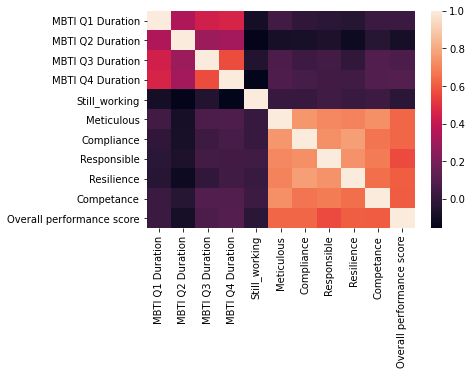

In [10]:
# checking correlation for numerical values / features
correlation_data = df.corr()
sns.heatmap(df.corr())

In [11]:
#Setting Standard Range (-0.1 , +0.1).
#Any Feature lies in this range will be omit 

cols_to_be_selected = []
all_cols = correlation_data.columns
index = 0;

for x in correlation_data['Overall performance score'].tolist():
    if(x >= -0.3 and x <=0.3):
        #neglecting the feature / column
        pass
    else:
        cols_to_be_selected.append(all_cols[index])
    index += 1

cols_to_be_selected

['Meticulous',
 'Compliance',
 'Responsible',
 'Resilience',
 'Competance',
 'Overall performance score']

In [12]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

# df.rename(columns={'Overall performance score':'final_score','Employment Type':'EmploymentType'},inplace=True)

# mod = ols('final_score~EmploymentType',data = df).fit()


In [13]:
# aov1 = sm.stats.anova_lm(mod,type=2)
# aov1

In [14]:
# aov1['PR(>F)'][0] > 0.05

In [15]:
# df.rename(columns={'Job Level':'JobLevel'},inplace=True)
# mod = ols('final_score~JobLevel',data = df).fit()
# aov1 = sm.stats.anova_lm(mod,type=2)
# aov1

In [16]:
# aov1['PR(>F)'][0] > 0.05

In [17]:
# df.rename(columns={'Education Level':'EducationLevel'},inplace=True)
# mod = ols('final_score~EducationLevel',data = df).fit()
# aov1 = sm.stats.anova_lm(mod,type=2)
# aov1

In [18]:
df_encoded = df[['Employment Type','Job Level','Education Level','Willingness to Relocate','MBTI Q1','MBTI Q2','MBTI Q3','MBTI Q4','MBTI Result','Overall performance score']]
df_encoded

Employment Type                                 Job Level  \
0    Full-Time Permanent  Experienced with over 2 years experience   
1    Full-Time Permanent  Experienced with over 2 years experience   
2    Full-Time Permanent  Experienced with over 2 years experience   
3    Full-Time Permanent  Experienced with over 2 years experience   
4    Full-Time Permanent  Experienced with over 2 years experience   
5    Full-Time Permanent            Management (Manager, Director)   
6    Full-Time Permanent  Experienced with over 2 years experience   
7    Full-Time Permanent  Experienced with over 2 years experience   
8    Full-Time Permanent                      New Grad/Entry Level   
9    Full-Time Permanent  Experienced with over 2 years experience   
10   Full-Time Permanent                      New Grad/Entry Level   
11   Full-Time Permanent                      New Grad/Entry Level   
12   Full-Time Permanent            Management (Manager, Director)   
13   Full-Time Permanent  Experienced with over 2 years experience   
14   Full-Time Permanent                      New Grad/Entry Level   
15   Full-Time Permanent  Experienced with over 2 years experience   
16   Full-Time Permanent  Experienced with over 2 years experience   
17   Full-Time Permanent  Experienced with over 2 years experience   
18   Full-Time Permanent                      New Grad/Entry Level   
19   Full-Time Permanent            Management (Manager, Director)   
20   Full-Time Permanent  Experienced with over 2 years experience   
21   Full-Time Permanent  Experienced with over 2 years experience   
22   Full-Time Permanent            Management (Manager, Director)   
23   Full-Time Permanent            Management (Manager, Director)   
24   Full-Time Permanent  Experienced with over 2 years experience   
25   Full-Time Permanent  Experienced with over 2 years experience   
26   Full-Time Permanent  Experienced with over 2 years experience   
27   Full-Time Permanent                      New Grad/Entry Level   
28   Full-Time Permanent  Experienced with over 2 years experience   
29   Full-Time Permanent  Experienced with over 2 years experience   
30   Full-Time Permanent  Experienced with over 2 years experience   
31   Full-Time Permanent  Experienced with over 2 years experience   
32   Full-Time Permanent            Management (Manager, Director)   
33   Full-Time Permanent                      New Grad/Entry Level   
34   Full-Time Permanent                      New Grad/Entry Level   
35   Full-Time Permanent  Experienced with over 2 years experience   
36   Full-Time Permanent            Management (Manager, Director)   
37   Full-Time Permanent            Management (Manager, Director)   
38   Full-Time Permanent            Management (Manager, Director)   
39   Full-Time Permanent  Experienced with over 2 years experience   
40   Part-Time Permanent  Experienced with over 2 years experience   
41   Full-Time Permanent  Experienced with over 2 years experience   
42   Full-Time Permanent            Management (Manager, Director)   
43   Full-Time Permanent                      New Grad/Entry Level   
44   Full-Time Permanent                      New Grad/Entry Level   
45   Full-Time Permanent            Management (Manager, Director)   
46   Full-Time Permanent            Management (Manager, Director)   
47   Full-Time Permanent  Experienced with over 2 years experience   
48   Full-Time Permanent  Experienced with over 2 years experience   
49   Full-Time Permanent  Experienced with over 2 years experience   
50   Full-Time Permanent  Experienced with over 2 years experience   
51   Full-Time Permanent            Management (Manager, Director)   
52   Full-Time Permanent  Experienced with over 2 years experience   
53   Full-Time Permanent  Experienced with over 2 years experience   
54   Full-Time Permanent  Experienced with over 2 years experience   
55   Full-Time Permanent  Experienced with over 2 years experience   
56   Full-Time Perm

In [19]:
# hot one encoding
def oneHotEncoding_with_names(columnName):
    
    temp_df = pd.get_dummies(df_encoded[columnName],drop_first=True)
    for x in temp_df.columns:
        temp_df.rename(columns={x:columnName+'_'+str(x)},inplace=True)
    
    for x in temp_df.columns:
        df_encoded[x] = temp_df[x]
    
    df_encoded.drop(labels=columnName,axis=1,inplace=True)
    return df

for y in df_encoded.columns:
    if(df[y].dtype==object):
        oneHotEncoding_with_names(y)
        
df_encoded

C:\Users\S.M.Ammar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Overall performance score  Employment Type_Full-Time Permanent  \
0                            3                                    1   
1                            2                                    1   
2                            3                                    1   
3                            2                                    1   
4                            4                                    1   
5                            3                                    1   
6                            2                                    1   
7                            2                                    1   
8                            3                                    1   
9                            5                                    1   
10                           3                                    1   
11                           2                                    1   
12                           3                                    1   
13                           3                                    1   
14                           2                                    1   
15                           3                                    1   
16                           4                                    1   
17                           3                                    1   
18                           2                                    1   
19                           2                                    1   
20                           2                                    1   
21                           3                                    1   
22                           2                                    1   
23                           3                                    1   
24                           3                                    1   
25                           3                                    1   
26                           3                                    1   
27                           4                                    1   
28                           3                                    1   
29                           3                                    1   
30                           3                                    1   
31                           2                                    1   
32                           3                                    1   
33                           3                                    1   
34                           3                                    1   
35                           2                                    1   
36                           3                                    1   
37                           4                                    1   
38                           1                                    1   
39                           2                                    1   
40                           4                                    0   
41                           3                                    1   
42                           3                                    1   
43                           2                                    1   
44                           2                                    1   
45                           2                                    1   
46                           3                                    1   
47                           1                                    1   
48                           3                                    1   
49                           3                                    1   
50                           5                                    1   
51                           2                                    1   
52                           2                                    1   
53                           4                                    1   
54                           3                                    1   
55                           

In [20]:
from sklearn.feature_selection import chi2

In [21]:
X = df_encoded
Y = df_encoded['Overall performance score']

print(X.shape)
print(Y.shape)

(491, 40)
(491,)


In [22]:
f_score = chi2(X,Y)
f_score

(array([104.37416778,   0.23106074,   2.50133378,   1.3536254 ,
         21.24111415,   3.30056125,   1.59141059,   0.62761378,
          1.3536254 ,   3.63729871,   3.50733515,   2.07471143,
         14.7624707 ,   1.59764013,   0.1655193 ,   4.58052286,
          5.20045676,   5.06136892,   2.02947155,   2.3902677 ,
          4.17065422,   1.03086541,   1.81416646,   3.13487033,
          5.68604434,   1.21791047,   5.02534189,   2.14687827,
          0.89921384,   3.53493392,   4.36738737,   3.70862391,
          3.05190611,   0.87364418,   9.96204959,   1.71853417,
          3.22153481,   6.19834266,   7.22143297,   7.35651595]),
 array([1.15144612e-21, 9.93818773e-01, 6.44396975e-01, 8.52213744e-01,
        2.83646622e-04, 5.08843338e-01, 8.10335087e-01, 9.59946290e-01,
        8.52213744e-01, 4.57311027e-01, 4.76763896e-01, 7.22019619e-01,
        5.22009316e-03, 8.09216216e-01, 9.96758628e-01, 3.33106038e-01,
        2.67340782e-01, 2.81058426e-01, 7.30338089e-01, 6.64386763e-01

In [23]:
p_values = pd.Series(f_score[1],index=X.columns)
p_values.sort_values(ascending=True,inplace=True)
p_values

Overall performance score                             1.151446e-21
Employment Type_Other                                 2.836466e-04
Education Level_College                               5.220093e-03
MBTI Result_The Individualistic Doer - ISTP           4.107183e-02
MBTI Result_The Spontaneous Idealist - ENFP           1.182053e-01
MBTI Result_The Social Realist - ESFJ                 1.246391e-01
MBTI Result_The Sensitive Doer - ISFP                 1.848175e-01
MBTI Q4_P                                             2.238536e-01
Education Level_Masters                               2.673408e-01
Education Level_Unspecified                           2.810584e-01
MBTI Result_The Dreamy Idealist - INFP                2.847071e-01
Education Level_MBA                                   3.331060e-01
MBTI Result_The Good-natured Realist - ISFJ           3.585627e-01
Willingness to Relocate_Yes                           3.834027e-01
MBTI Result_The Groundbreaking Thinker - ENTP         4.468729

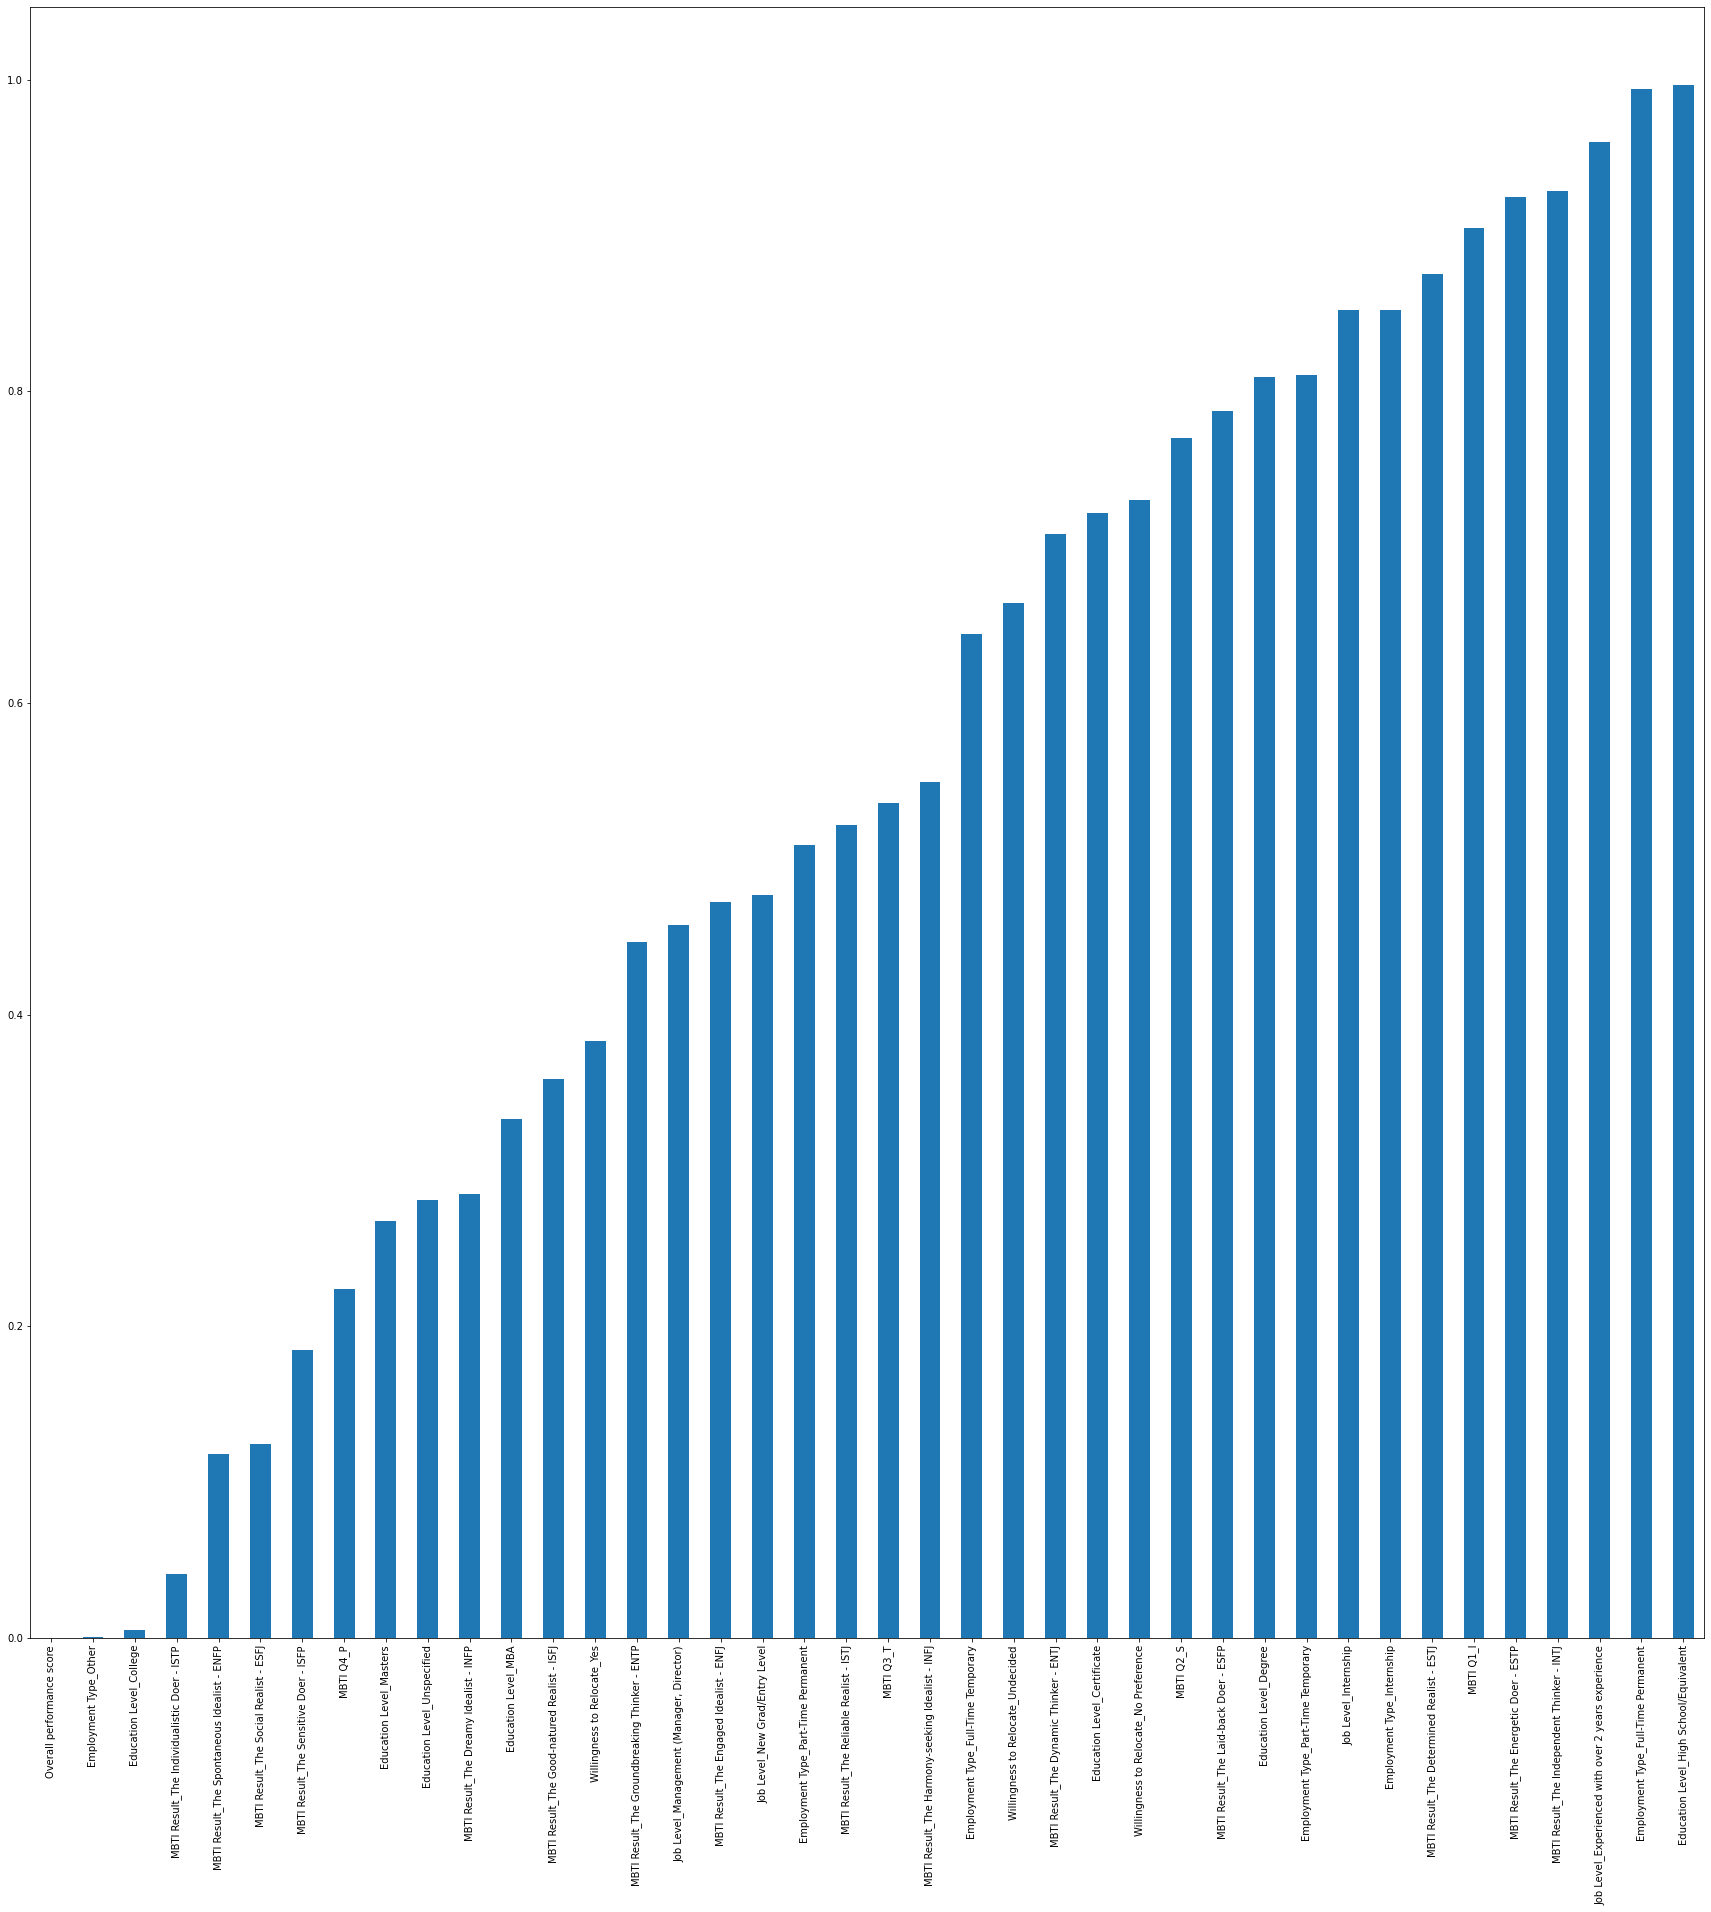

In [24]:
plt.figure(figsize=(30,30))
p_values.plot.bar()


In [25]:
for x in range(len(p_values)):
    if(p_values[x]<=0.05):
        print(p_values.index[x])

Overall performance score
Employment Type_Other
Education Level_College
MBTI Result_The Individualistic Doer - ISTP


In [26]:
final_df = pd.DataFrame()
final_df['Meticulous'] = df['Meticulous']
final_df['Compliance'] = df['Compliance']
final_df['Responsible'] = df['Responsible']
final_df['Resilience'] = df['Resilience']
final_df['Competance'] = df['Competance']
final_df['Employment Type_Other'] = df_encoded['Employment Type_Other']
final_df['Education Level_College'] = df_encoded['Education Level_College']
final_df['MBTI Result_The Individualistic Doer - ISTP'] = df_encoded['MBTI Result_The Individualistic Doer - ISTP']
final_df['Overall performance score'] = df['Overall performance score']

final_df

features = final_df[['Meticulous','Compliance','Responsible','Resilience','Competance','Employment Type_Other','Education Level_College','MBTI Result_The Individualistic Doer - ISTP']]
target = final_df[['Overall performance score']]

In [34]:
# Splitting Data into training testing and testing models
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = cross_validate(reg,features,target,cv=50,return_estimator=True,scoring ='neg_mean_absolute_error')
model

{'estimator': (LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(

In [35]:
reg_2 = LinearRegression()
model_2 = cross_validate(reg_2,features,target,cv=50,return_estimator=True,scoring ='r2')
model_2

{'estimator': (LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(

In [36]:
from sklearn import linear_model
reg_3 = linear_model.Lasso(alpha=0.1)
model_3 = cross_validate(reg_3,features,target,cv=50,return_estimator=True,scoring ='r2')
model_3

{'estimator': (Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso(alpha=0.1),
  Lasso

In [43]:
model_2['test_score'][26] # 83 percent accuracy

0.8319905192295716

In [45]:
final_model = model_2['estimator'][26]
import pickle
with open('score_estimator.pkl', 'wb') as fid:
    pickle.dump(final_model, fid)


# How to pass on test data of candidate to predict score.

## The sequence of features is the following

### 1. Meticulous
### 2. Compliance
### 3. Responsible
### 4. Resilience
### 5. Competance
### 6. Employment Type_Other
### 7. Education Level_College
### 8. MBTI Result_The Individualistic Doer - ISTP

## All of these values must be numerical. 

## In case if the first 5 features, you can direct enter the numerical value. 
## In case of the last 3 features, you must input '1' if that particular value is present in candidate other wise '0'

In [46]:
loaded_model = pickle.load(open('score_estimator.pkl', 'rb')

In [52]:
# picking first candidate from Employee.csv
prediction = loaded_model.predict([[3,3,3,3,3,0,0,0]])
prediction = round(prediction[0][0],0)
prediction

3.0